In [243]:
import os
import pandas as pd
import seaborn as sns
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.api import Holt, ExponentialSmoothing


from sklearn.metrics import mean_squared_error
from math import sqrt 
from scipy import stats

# # for presentation purposes
# import warnings
# warnings.filterwarnings("ignore")
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

### Wrangle the airline data by airline

In [244]:
flights = wrangle.pull_airline_data('UA')

In [245]:
flights.isna().sum()/len(flights)

FL_DATE                0.000000
OP_CARRIER             0.000000
CARRIER_DELAY          0.810939
WEATHER_DELAY          0.810939
NAS_DELAY              0.810939
SECURITY_DELAY         0.810939
LATE_AIRCRAFT_DELAY    0.810939
dtype: float64

### Resample by daily mean as well as handle nulls

In [246]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:87: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_daily_mean = flights_daily_mean.append(list_tuples)
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:102: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  list_tuples_2.FL_DATE = list_tuples_2.FL_DATE.astype('datetime64')
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:105: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [247]:
flights_daily_mean

,average_delay
FL_DATE,
2009-01-01,9.676707
2009-01-02,14.156364
2009-01-03,11.209040
2009-01-04,7.436530
2009-01-05,8.880218
...,...
2019-12-27,7.031214
2019-12-28,22.058198
2019-12-29,19.964902


### Split the data based on chosen duration

In [248]:
def train_test_split(df=flights_daily_mean, time_duration='2W'):
    flights_fortnightly_mean = df.resample(time_duration).mean()
    
    # split into train, validation, test
    train = flights_fortnightly_mean[:'2016']
    validate = flights_fortnightly_mean['2017' : '2018']
    test = flights_fortnightly_mean['2019' : ]

    return train, validate, test

train, validate, test = train_test_split(df=flights_daily_mean, time_duration='2W')

In [249]:
train

,average_delay
FL_DATE,
2009-01-04,10.619660
2009-01-18,12.043650
2009-02-01,8.149865
2009-02-15,9.091530
2009-03-01,10.083955
...,...
2016-10-30,11.527966
2016-11-13,7.161314
2016-11-27,8.715790


In [250]:
validate

,average_delay
FL_DATE,
2017-01-08,16.162002
2017-01-22,14.448565
2017-02-05,8.488068
2017-02-19,13.156123
2017-03-05,10.551286
2017-03-19,11.482520
2017-04-02,12.647861
2017-04-16,12.048149
2017-04-30,11.959839


In [251]:
test

,average_delay
FL_DATE,
2019-01-06,14.182321
2019-01-20,12.655742
2019-02-03,17.150199
2019-02-17,15.690293
2019-03-03,18.794164
2019-03-17,15.060238
2019-03-31,11.252214
2019-04-14,14.758753
2019-04-28,14.559151


### Graph the average delay

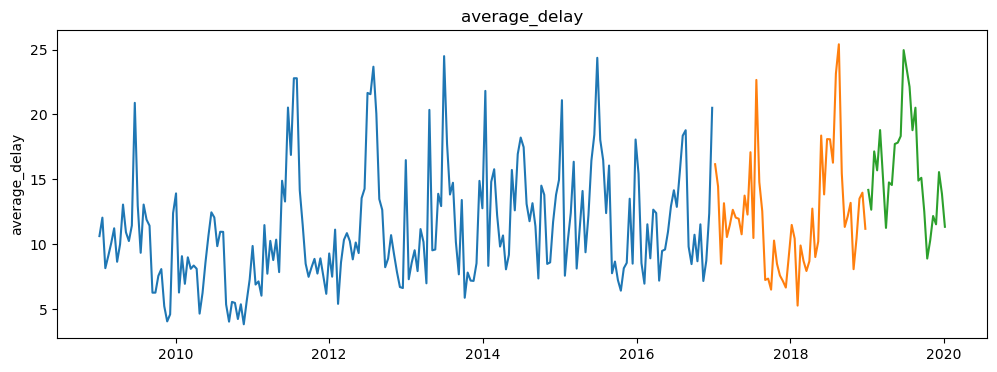

In [252]:
def graph_split(train, validate, test):

        plt.figure(figsize=(12,4))
        plt.plot(train['average_delay'])
        plt.plot(validate['average_delay'])
        plt.plot(test['average_delay'])
        plt.ylabel('average_delay')
        plt.title('average_delay')
        plt.show()

graph_split(train, validate, test)

### Define functions that are used later.  Borrowed from the syllabus.

In [253]:
# evaluation function to compute rmse
# Taken from the syllabus
def evaluate(target_var):
    #Computes rmse to two decimal places
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 2)
    return rmse


In [254]:
# plot and evaluate 

def plot_and_eval(target_var):
    
    # Plots train and validate as well as the predictions based on train. 
    
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [255]:
# Create the empty dataframe

eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df


,model_type,target_var,rmse


In [256]:
# function to store rmse for comparison purposes

def append_eval_df(model_type, target_var):
     # Appends the dataframe with rmse of the tests
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_df, d])

In [257]:
# take the last average from the train set
last_average = train['average_delay'][-1:][0]


yhat_df = pd.DataFrame(
    {'average_delay': [last_average]},
    index=validate.index)

yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,20.510834
2017-01-22,20.510834
2017-02-05,20.510834
2017-02-19,20.510834
2017-03-05,20.510834


average_delay -- RMSE: 9


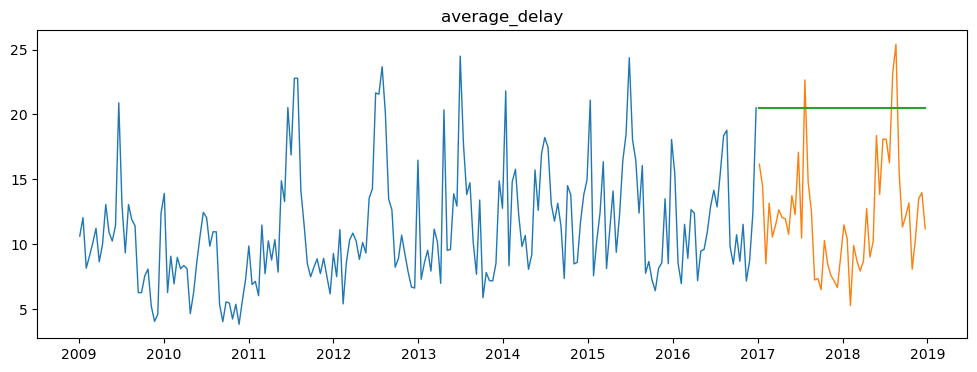

In [258]:
plot_and_eval('average_delay')

In [259]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38


In [260]:
# get the average of fortnightly delays from the train set
average_of_fortnightly_means = round(train['average_delay'].mean(), 2)


yhat_df = pd.DataFrame({'average_delay': [average_of_fortnightly_means]},
                        index=validate.index)

yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,11.15
2017-01-22,11.15
2017-02-05,11.15
2017-02-19,11.15
2017-03-05,11.15


average_delay -- RMSE: 4


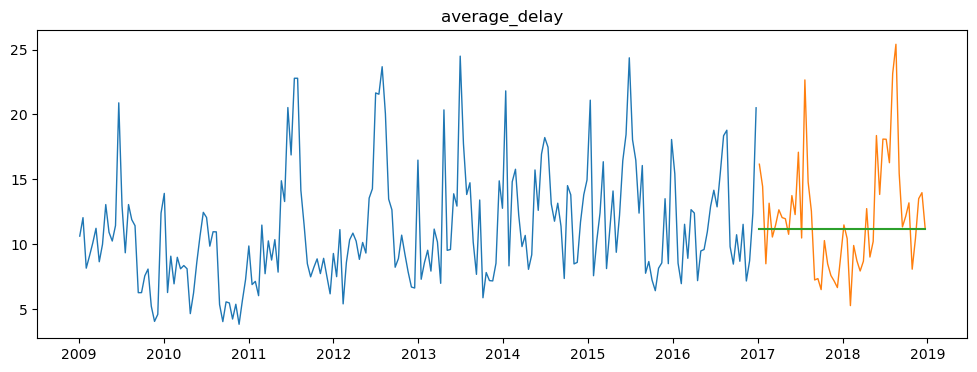

In [261]:
plot_and_eval('average_delay')

In [262]:
eval_df = append_eval_df(model_type = 'average_of_all_test_means', 
                             target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38


In [263]:
#make a semi-annual rolling average

period = 13 #for 13 fortnights or a half year to get yearly average

rolling_average_delay = round(train['average_delay'].rolling(period).mean()[-1], 2)


# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'average_delay': [rolling_average_delay]},
                         index=validate.index)
yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,12.58
2017-01-22,12.58
2017-02-05,12.58
2017-02-19,12.58
2017-03-05,12.58


average_delay -- RMSE: 4


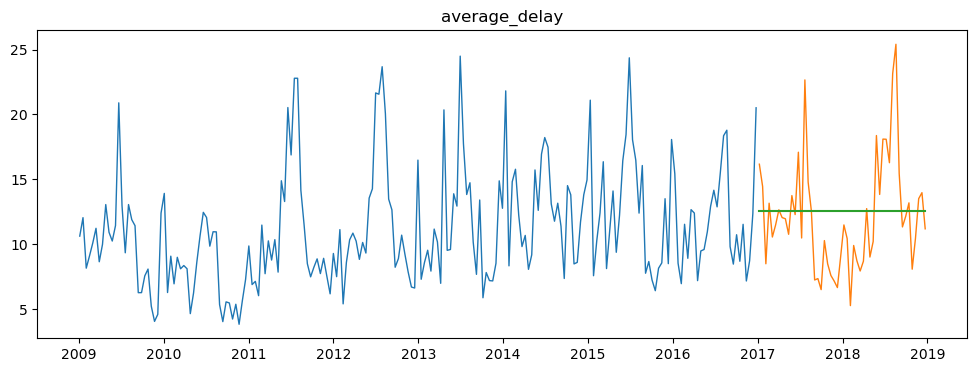

In [264]:
plot_and_eval('average_delay')

In [265]:
#Rolling averages for 1 fortnight, 4 weeks, 12 weeks, 26 weeks and 1 year

periods = [1, 2, 6, 13, 26]

for p in periods: 
    rolling_average_delay = round(train['average_delay'].rolling(p).mean()[-1], 2)
   
    yhat_df = pd.DataFrame({'average_delay': [rolling_average_delay]},
                            index=validate.index)
    
    model_type = str(p) + '_fortnight_moving_avg'
    
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)
        
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,1_fortnight_moving_avg,average_delay,9.37
0,2_fortnight_moving_avg,average_delay,6.04
0,6_fortnight_moving_avg,average_delay,4.32
0,13_fortnight_moving_avg,average_delay,4.29
0,26_fortnight_moving_avg,average_delay,4.29


### Residuals make sense as delays are weather driven and weater is never consistent

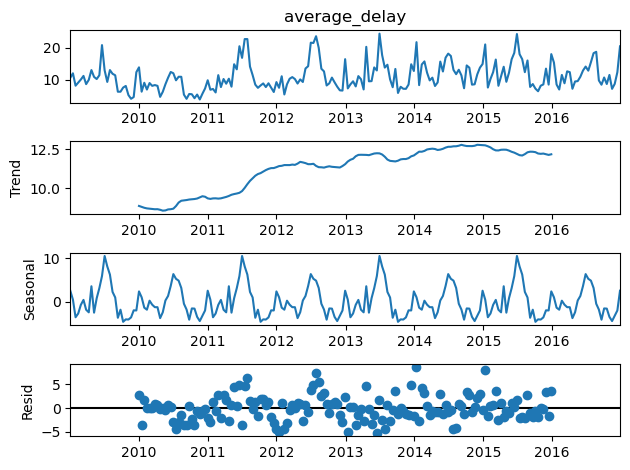

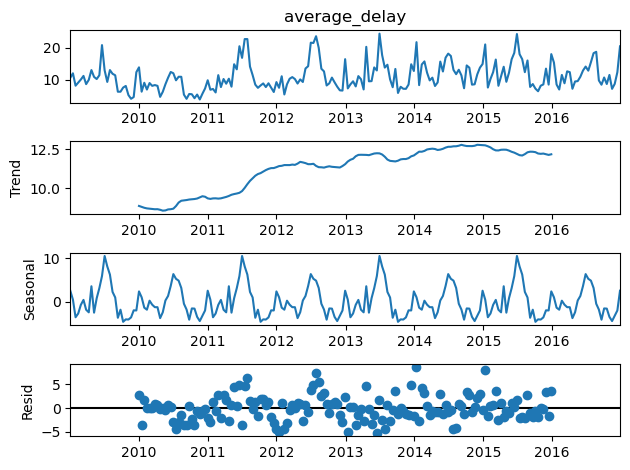

In [266]:
sm.tsa.seasonal_decompose(train['average_delay']).plot()

### A look at the models

In [267]:
model = Holt(train['average_delay'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_values = model.predict(start = validate.index[0],
                          end = validate.index[-1])
yhat_df['average_delay'] = round(yhat_values, 2)

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2232/777573541.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['average_delay'], exponential=False, damped=True)


average_delay -- RMSE: 6


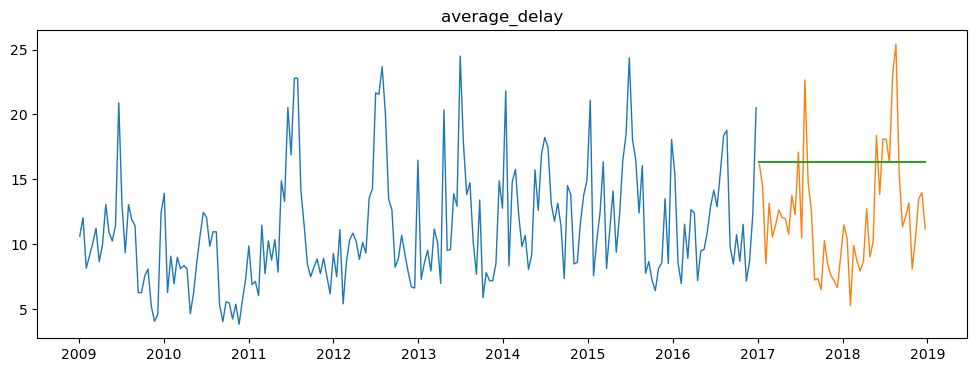

In [268]:
plot_and_eval('average_delay')

In [269]:
eval_df = append_eval_df(model_type = 'holts_linear_trend', 
                            target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,1_fortnight_moving_avg,average_delay,9.37
0,2_fortnight_moving_avg,average_delay,6.04
0,6_fortnight_moving_avg,average_delay,4.32
0,13_fortnight_moving_avg,average_delay,4.29
0,26_fortnight_moving_avg,average_delay,4.29
0,holts_linear_trend,average_delay,5.98


In [270]:
# Models for quantity
hst_average_delay_fit1 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add').fit()
hst_average_delay_fit2 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul').fit()
hst_average_delay_fit3 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add', damped=True).fit()
hst_average_delay_fit4 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul', damped=True).fit()


/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2232/3474776484.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hst_average_delay_fit3 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add', damped=True).fit()
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2232/3474776484.py:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hst_average_delay_fit4 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul', damped=True).fit()


In [271]:
results_average_delay=pd.DataFrame({'model':['hst_average_delay_fit1', 'hst_average_delay_fit2', 'hst_average_dalay_fit3', 'hst_average_delay_fit4'],
                              'SSE':[hst_average_delay_fit1.sse, hst_average_delay_fit2.sse, hst_average_delay_fit3.sse, hst_average_delay_fit4.sse]})
results_average_delay.sort_values(by='SSE')

,model,SSE
3,hst_average_delay_fit4,1606.169053
1,hst_average_delay_fit2,1611.302171
0,hst_average_delay_fit1,1689.469556
2,hst_average_dalay_fit3,1690.074690


In [272]:
yhat_df = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + 1)},
                          index=validate.index)
yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,14.813421
2017-01-22,11.071589
2017-02-05,11.130788
2017-02-19,13.337066
2017-03-05,13.234056


average_delay -- RMSE: 4


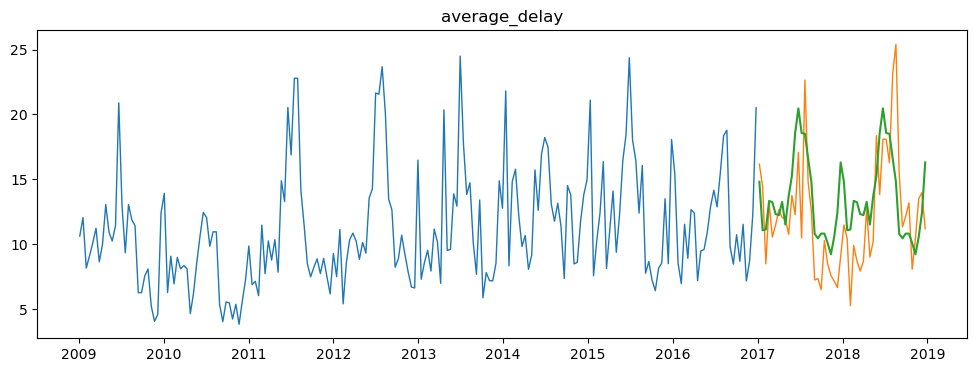

In [273]:
plot_and_eval('average_delay')

In [274]:
eval_df = append_eval_df(model_type = 'holts_seasonal', 
                            target_var = 'average_delay')

eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,1_fortnight_moving_avg,average_delay,9.37
0,2_fortnight_moving_avg,average_delay,6.04
0,6_fortnight_moving_avg,average_delay,4.32
0,13_fortnight_moving_avg,average_delay,4.29
0,26_fortnight_moving_avg,average_delay,4.29
0,holts_linear_trend,average_delay,5.98
0,holts_seasonal,average_delay,3.74


In [275]:
# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015.
yhat_df = train.loc['2015':'2017'] + train.diff(53).mean()

# set yhat_df to index of validate
yhat_df.index = validate.index

In [276]:
yhat_df

,average_delay
FL_DATE,
2017-01-08,22.243304
2017-01-22,8.711586
2017-02-05,11.415486
2017-02-19,13.553611
2017-03-05,17.497873
2017-03-19,9.263120
2017-04-02,12.223259
2017-04-16,15.244510
2017-04-30,10.519208


average_delay -- RMSE: 4


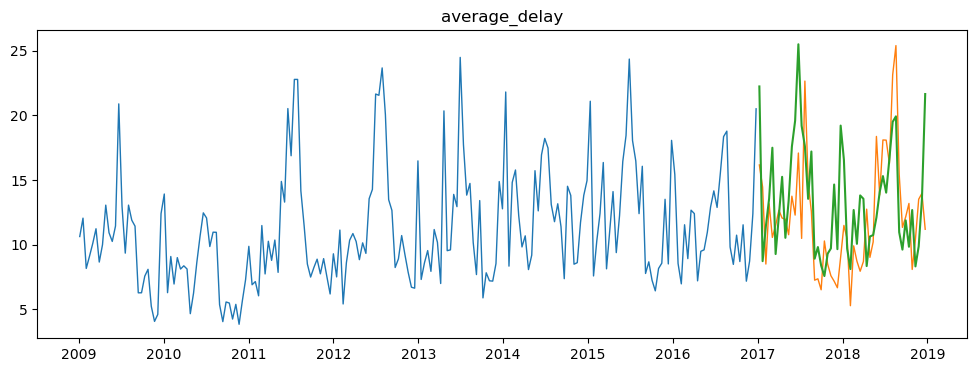

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,1_fortnight_moving_avg,average_delay,9.37
0,2_fortnight_moving_avg,average_delay,6.04
0,6_fortnight_moving_avg,average_delay,4.32
0,13_fortnight_moving_avg,average_delay,4.29
0,26_fortnight_moving_avg,average_delay,4.29
0,holts_linear_trend,average_delay,5.98
0,holts_seasonal,average_delay,3.74
0,previous 2 years,average_delay,4.44


In [277]:
plot_and_eval('average_delay')
eval_df = append_eval_df(model_type = 'previous 2 years', target_var = 'average_delay')

eval_df

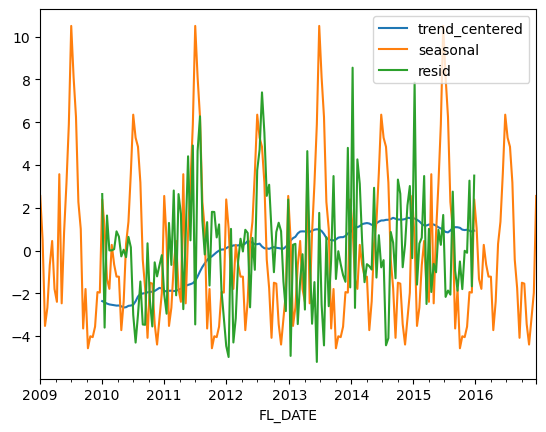

In [278]:
y = train.average_delay.resample('2w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### Final Test

In [279]:
yhat_df = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + test.shape[0] + 1)})
yhat_df

,average_delay
2017-01-08,14.813421
2017-01-22,11.071589
2017-02-05,11.130788
2017-02-19,13.337066
2017-03-05,13.234056
...,...
2019-11-24,10.548040
2019-12-08,12.421698
2019-12-22,16.301096
2020-01-05,14.813397


In [280]:
yhat_df = yhat_df['2019':]

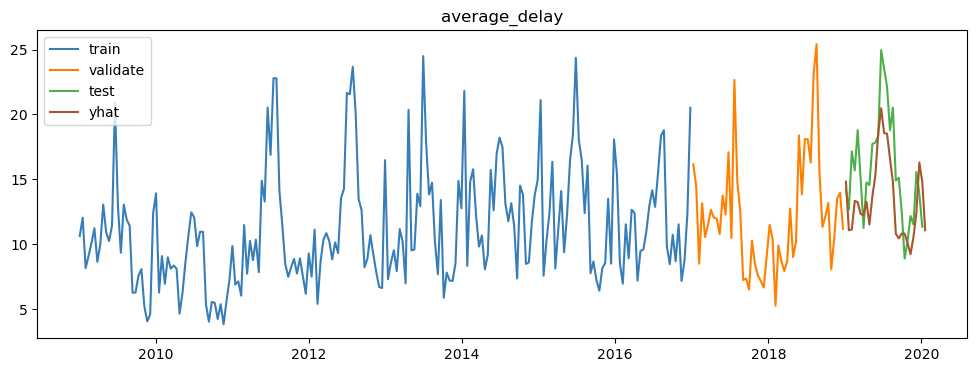

In [281]:
def final_plot(target_var, train, validate, test, yhat_df):
    yhat_df = yhat_df['2019':]
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(validate[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(target_var)
    plt.show()
    
final_plot('average_delay', train, validate, test, yhat_df)

In [282]:
def final_rmse(test, yhat_df):
    
    #The predictions does one extra going into 2020
    yhat_df = yhat_df[0:-1]
    
    #rmse calculater
    rmse_sales_total = sqrt(mean_squared_error(test['average_delay'], 
                                           yhat_df['average_delay']))

    print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
    print('rmse-sales total: ', rmse_sales_total)


    final_plot('average_delay', train, validate, test, yhat_df)


FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-sales total:  3.315358668096702


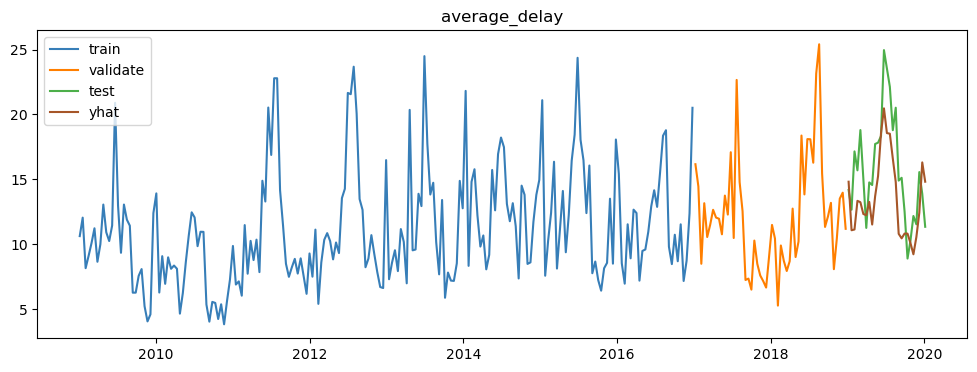

In [283]:
final_rmse(test, yhat_df)

In [284]:
forecast = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + test.shape[0] + 1 + 365)})
forecast = forecast['2018':]
forecast

,average_delay
2018-01-07,14.813403
2018-01-21,11.071572
2018-02-04,11.130772
2018-02-18,13.337051
2018-03-04,13.234041
...,...
2033-11-20,12.421697
2033-12-04,16.301095
2033-12-18,14.813397
2034-01-01,11.071566


In [285]:
len(yhat_df)

28

In [286]:
test

,average_delay
FL_DATE,
2019-01-06,14.182321
2019-01-20,12.655742
2019-02-03,17.150199
2019-02-17,15.690293
2019-03-03,18.794164
2019-03-17,15.060238
2019-03-31,11.252214
2019-04-14,14.758753
2019-04-28,14.559151


In [287]:
yhat_df = yhat_df[0:-2]

In [288]:
yhat_df

,average_delay
2019-01-06,14.813399
2019-01-20,11.071568
2019-02-03,11.130768
2019-02-17,13.337047
2019-03-03,13.234038
2019-03-17,12.324439
2019-03-31,12.233647
2019-04-14,13.262204
2019-04-28,11.513294
2019-05-12,13.686101


## Findings

### I have found that the delay columns are independent and that they can be combined into one colum for total delay for each observation.  I have also found that the best resample is the 2 week average for delays.  This provides the least noise in extracting the seasonal patterns year over year while maintaining enough correlation peaks over several years to run an analysis.  
